# Тестовое задание, Рогатов Илья

Решить задачу:

Подкинули монету N раз. Кол-во случаев, когда выпал орёл, на 10% больше, чем кол-во случаев, когда выпала решка. При каком N мы можем сказать, что монета «нечестная» (орёл и решка выпадают с разной вероятностью)?
Важен не только ответ, но и решение.

In [1]:
import numpy as np
from scipy import stats

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Переведем задачу в термины проверку статистической гипотезы:

* **выборка:** бинарный вектор длины $n$, где 1 — Орел, 0 — решка;
* **гипотеза $H_0$:** Монета честная $(p=0.5)$;
* **гипотеза $H_1$:** Монета нечестная $(p!=0.5)$;
* **статистика $T$:** Количество единиц в выборке

Так как кол-во случаев, когда выпал орёл, на 10% больше, чем кол-во случаев, когда выпала решка, то  мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(0.55)$. Нулевая гипотеза того, что монета честная соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выпадения орла равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$. В данном случае мы можем использовать двусторонний биноминальный критерий для доли.

Для проверки гипотезы будем брать стандартный уровень значимости $\alpha = 0.05$

Проведем непосредственно тест. Построим график p-value в зависимости от количества бросков монеты. Количество успехов тогда будет равно $0.55n$

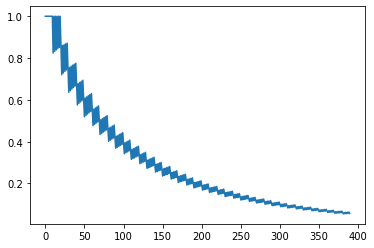

In [21]:
plt.plot([stats.binom_test(0.55*n, n, 0.5) for n in range(10,400)])

Проверим, при каком значении мы можем отвергнуть нулевую гипотезу:

In [30]:
n = 10

while stats.binom_test(0.55*n, n, 0.5) > 0.05:
    n = n + 1
    
print('p-value:', stats.binom_test(0.55*n, n, 0.5) , '\nnum of exps:', n)

p-value: 0.048357318733369584 
num of exps: 411


Видим, что при 411 бросках p-value < $\alpha$ и мы отвергаем нулевую гипотезу в пользу альтернативной.